### 미션: 구별 동단위 건물주용별 평균 시세
#### 1. 구단위 데이터 조회
- 구 이름 입력
- 서울특별시_부동산_실거래가_정보_2020년.csv 파일에서 해당 구 이름을 기준으로 데이터 조회
- '자치구명','법정동명','건물주용도','건축년도', 건물면적', '층정보','물건금액', '건물명' 데이터 출력

In [30]:
# 사용자로부터 구명, 동명을 입력받아 데이터 조회
# 출력값:'자치구명','법정동명','건물주용도','건축년도', 건물면적', '층정보'
#              3       5          15(-4)       17(-2)     11          13
# '물건금액', '건물명'
#    16(-3)     18(-1)
# 출력형식: 리스트 구조 출력

import csv
import matplotlib.pyplot as plt

g_name=input('조회 구 이름 입력: ')
#d_name=input('조회 동 이름 입력: ')





f=open('./data/서울특별시_부동산_실거래가_정보_2020년.csv')
data=csv.reader(f)
header=next(data)
#print(header)

data_lst=[]

for row in data:
    if g_name == row[3] :              #and d_name in row[5]
        data_lst.append([row[3], row[5], row[15], row[17], row[11],row [13], row[16], row[18]])




f.close()

print(data_lst)


조회 구 이름 입력: 성북구
[['성북구', '장위동', '아파트', '0', '59.920000', '5', '749000000', '래미안 장위포레카운티'], ['성북구', '길음동', '아파트', '0', '84.770000', '18', '1200000000', '롯데캐슬 클라시아 '], ['성북구', '장위동', '아파트', '0', '116.910000', '2', '1270000000', '래미안장위퍼스트하이'], ['성북구', '석관동', '아파트', '1998', '84.900000', '17', '647000000', '두산'], ['성북구', '석관동', '단독주택', '1973', '59.970000', '', '270000000', ''], ['성북구', '장위동', '아파트', '0', '59.990000', '17', '820000000', '래미안장위퍼스트하이'], ['성북구', '성북동', '단독주택', '1980', '19.830000', '', '400000000', ''], ['성북구', '돈암동', '아파트', '1994', '84.720000', '12', '494000000', '동소문현대'], ['성북구', '정릉동', '단독주택', '1970', '61.350000', '', '295000000', ''], ['성북구', '장위동', '단독주택', '1970', '62.550000', '', '714600000', ''], ['성북구', '장위동', '아파트', '0', '84.480000', '12', '1150000000', '꿈의숲 아이파크'], ['성북구', '길음동', '단독주택', '1994', '119.250000', '', '500000000', ''], ['성북구', '상월곡동', '아파트', '2003', '59.950000', '22', '628000000', '동아에코빌'], ['성북구', '길음동', '아파트', '0', '84.770000', '8', '1160000000', '롯데캐슬 클라

#### 2. 조회구의 동별 아파트 평균 가격 계산
- 해당 구에 어떤 동이 있는지 동 리스트 찾기
- 해당 리스트를 이용해 동별 아파트 평균(합계/수량) 계산
- 동별 평균 출력

In [46]:
# 동 리스트 생성
d_lst=[]


for i in data_lst:
    if i[1] not in d_lst:
        d_lst.append(i[1])
     
        
      

#print(d_lst)



avg_lst=[]
# 동별 평균값 계산
for dong in d_lst:
    tot=0     #동 합계 초기화
    cnt=0     #동 조회 건수
    # 각 동별 아파트의 금액 합계, 조회 건수 계산
    for lst in data_lst:
        if dong==lst[1] and '아파트'== lst[2]:
            tot+=int(lst[-2])
            cnt+=1
    if cnt ==0:
        avg_lst.append({'동이름':dong,'평균판매가':0,'거래건수': cnt})
    else:
        avg=tot/cnt
        avg_lst.append({'동이름':dong,'평균판매가':int(avg),'거래건수': cnt})
    
#print(avg_lst)

import pandas as pd

df=pd.DataFrame(avg_lst)
df

    



,동이름,평균판매가,거래건수
0,장위동,743787678,168
1,길음동,843763421,871
2,석관동,673315019,253
3,성북동,332900000,10
4,돈암동,675744147,786
5,정릉동,529745429,1072
6,상월곡동,555521739,115
7,동선동5가,0,0
8,동선동3가,440000000,1
9,종암동,739472074,376


#### 3. 동별 평균 계산값을 그래프를 이용해 비교 분석
- pandas 모듈을 이용한 데이터 관리
- 꺾은선 그래프
- 막대 그래프
- boxplot 그래프

In [55]:
df1=df[df['평균판매가']!=0]
df1.sort_values(by=['평균판매가'], ascending=False) #DataFrame 구조에서 정렬하기

,동이름,평균판매가,거래건수
14,삼선동3가,955962962,27
1,길음동,843763421,871
13,보문동6가,824054054,148
20,보문동3가,809523255,43
24,보문동1가,785050000,4
31,보문동4가,772200000,10
19,안암동1가,745318181,33
16,삼선동2가,744601063,94
0,장위동,743787678,168
9,종암동,739472074,376


In [59]:
# 정렬한 결과 값을 메모리에 저장(변수 없데이트)

#df1.sort_values(by=['평균판매가'], ascending=False, inplace=True)
df1=df1.sort_values(by=['거래건수'], ascending=False)


,동이름,평균판매가,거래건수
5,정릉동,529745429,1072
1,길음동,843763421,871
4,돈암동,675744147,786
11,하월곡동,692055138,506
9,종암동,739472074,376
2,석관동,673315019,253
0,장위동,743787678,168
13,보문동6가,824054054,148
6,상월곡동,555521739,115
16,삼선동2가,744601063,94


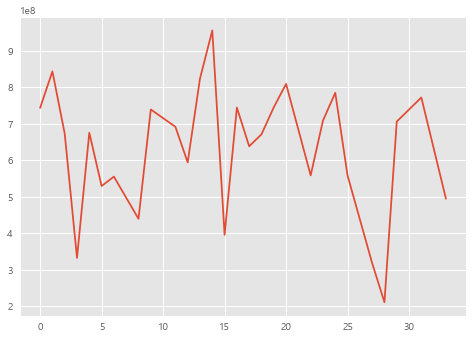

In [91]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#from matplotlib import font_manager as fm
font_path="C:/Windows/Fonts/malgun.ttf"      # 한글 폰트 경로 및 이름 정의(윈도우10 기반)
font_name=fm.FontProperties(fname=font_path).get_name()  # 포트 속성 변경
plt.rc('font', family=font_name)   # 차트 전체 포트 속성 변경


df1['평균판매가'].plot()
plt.show()

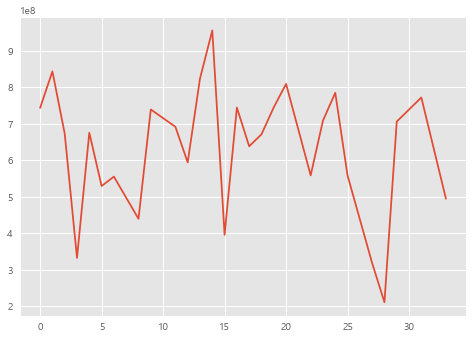

In [92]:
df1=df1.sort_index()
df1['평균판매가'].plot()
plt.show()

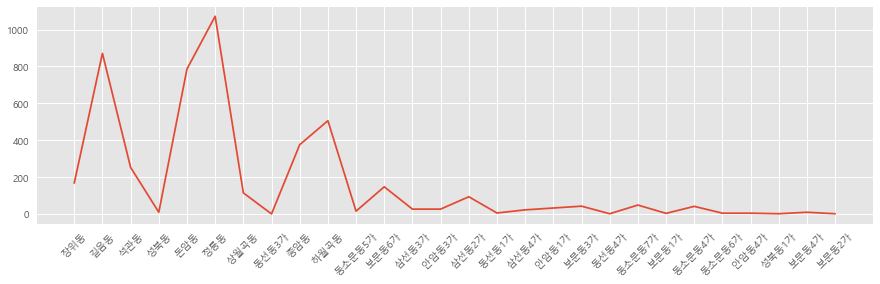

In [93]:
plt.figure(figsize=(15,4))
plt.xticks(size=10, rotation=45)
plt.plot(df1['동이름'],df1['거래건수'],)


plt.show()

#### 막대그래프

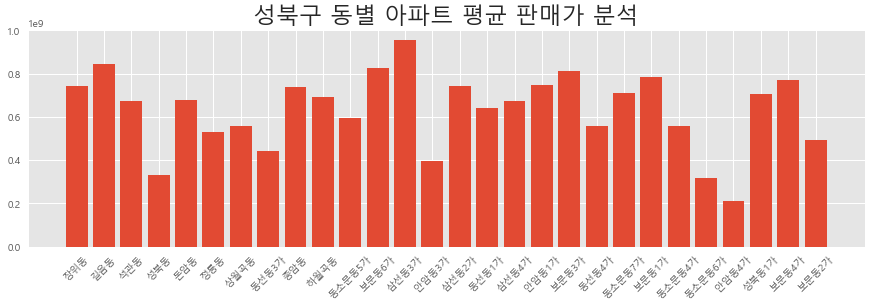

In [98]:
#print(plt.style.available) 사용가능한 style

plt.style.use('ggplot')
plt.figure(figsize=(15,4))
plt.xticks(size=10, rotation=45)
plt.bar(df1['동이름'],df1['평균판매가'],)

plt.title(g_name + " 동별 아파트 평균 판매가 분석", size=23)

plt.show()

#### boxplot 그래프
- 연속형 변수에 대해서 최소값(min), 제1사분위수(Q1), 중앙값(Q2 median), 제 3사분위수(Q3), 최대값(max) 의 요약통계량을 계산하는 것

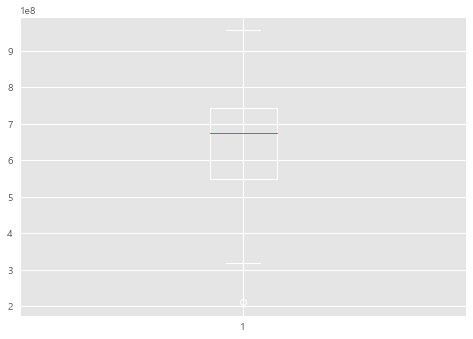

In [105]:
plt.boxplot(df1['평균판매가'],)
plt.show()